# Cardiovascular Disease


Conditions of the heart including structural and functional abnormalities.


Symptoms : Symptoms may include chest pain,  nausea, shortness of breath, sweating, dizziness, palpitations.


Causes : May be caused by congenital heart defects, atherosclerosis, reduced blood flow to the heart, infection or high blood pressure, or diabetes (arrhythmias).

# Import Dependencies

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingCVClassifier
import pickle

# Import Data

In [2]:
dataset=pd.read_csv('cardiovascular_disease.csv')

# EDA

# Attribute Information:


1) Age | Objective Feature | age | int (days)|
2) Height | Objective Feature | height | int (cm) |
3) Weight | Objective Feature | weight | float (kg) |
4) Gender | Objective Feature | gender | categorical code |1 - women, 2 - men
5) Systolic blood pressure | Examination Feature | ap_hi | int |
6) Diastolic blood pressure | Examination Feature | ap_lo | int |
7) Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8) Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9) Smoking | Subjective Feature | smoke | binary |
10) Alcohol intake | Subjective Feature | alco | binary |
11) Physical activity | Subjective Feature | active | binary |
12) Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [3]:
dataset.shape

(68783, 12)

In [4]:
dataset.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [6]:
dataset.describe()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,1.348749,164.361252,74.121934,126.614585,81.381591,1.364727,1.225986,0.088001,0.053632,0.803367,0.494904
std,6.768163,0.476578,8.184850,14.331392,16.763763,9.676679,0.678976,0.571961,0.283299,0.225293,0.397455,0.499978
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset.isna().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

In [8]:
dataset.dtypes

AGE                  int64
GENDER               int64
HEIGHT               int64
WEIGHT               int64
AP_HIGH              int64
AP_LOW               int64
CHOLESTEROL          int64
GLUCOSE              int64
SMOKE                int64
ALCOHOL              int64
PHYSICAL_ACTIVITY    int64
CARDIO_DISEASE       int64
dtype: object

In [9]:
Women,Men=dataset['GENDER'].value_counts()

In [10]:
dataset.groupby('GENDER')['ALCOHOL'].sum()

GENDER
1    1139
2    2550
Name: ALCOHOL, dtype: int64

[Text(0, 0, '44795'), Text(0, 0, '23988')]

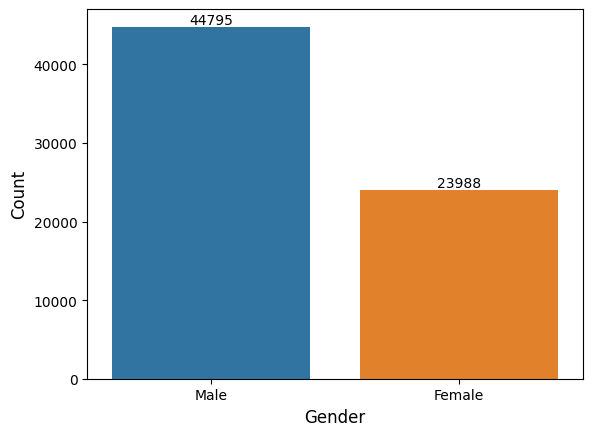

In [11]:
ax=sns.barplot(x=["Male","Female"],y=[Women,Men])
plt.xlabel("Gender",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])

In [ ]:
plt.subplots(figsize=(10, 5))
ax=sns.countplot(x=(dataset['AGE']),hue=(dataset['ALCOHOL']),data=dataset)
plt.xlabel("AGE",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [ ]:
plt.subplots(figsize=(10, 5))
ax=sns.countplot(x=(dataset['AGE']),hue=(dataset['SMOKE']),data=dataset)
plt.xlabel("AGE",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [ ]:
plt.subplots(figsize=(15, 8))
ax=sns.countplot(x=(dataset['AGE']),hue=(dataset['CARDIO_DISEASE']),data=dataset)
plt.xlabel("AGE",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [ ]:
plt.subplots(figsize=(5, 5))
ax=sns.countplot(x=(dataset['GENDER']),hue=(dataset['CARDIO_DISEASE']),data=dataset)
plt.xlabel("GENDER",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [16]:
dataset['CARDIO_DISEASE'].unique()

array([0, 1], dtype=int64)

In [17]:
patients_who_does_not_have_cardiovascular_disease=dataset[dataset['CARDIO_DISEASE']==0]
patients_who_does_have_cardiovascular_disease=dataset[dataset['CARDIO_DISEASE']==1]
print("patients_who_does_not_have_cardiovascular_disease",len(patients_who_does_not_have_cardiovascular_disease))
print("patients_who_does_have_cardiovascular_disease",len(patients_who_does_have_cardiovascular_disease))

patients_who_does_not_have_cardiovascular_disease 34742
patients_who_does_have_cardiovascular_disease 34041


[Text(0, 0, '34742'), Text(0, 0, '34041')]

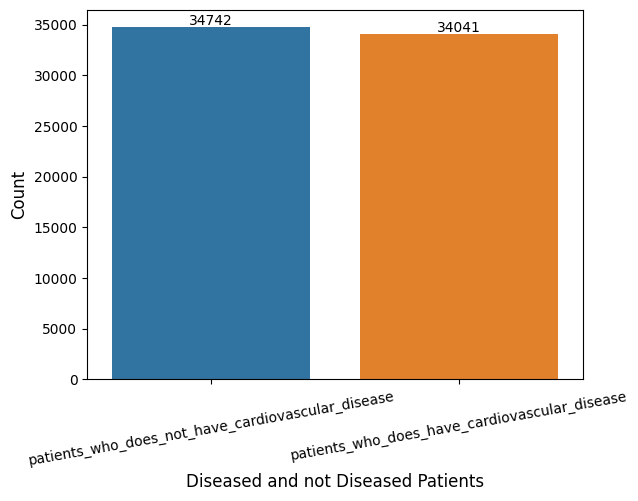

In [18]:
ax=sns.barplot(x=["patients_who_does_not_have_cardiovascular_disease","patients_who_does_have_cardiovascular_disease"],y=[len(patients_who_does_not_have_cardiovascular_disease),len(patients_who_does_have_cardiovascular_disease)])
plt.xticks(rotation=10)
plt.xlabel("Diseased and not Diseased Patients",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])

In [32]:
new_patients_who_does_have_cardiovascular_disease=patients_who_does_have_cardiovascular_disease.sample(len(patients_who_does_not_have_cardiovascular_disease),replace=True)

In [34]:
dataset1=pd.concat([patients_who_does_not_have_cardiovascular_disease,new_patients_who_does_have_cardiovascular_disease])
dataset1.shape

(69484, 12)

# Spliting the data for training and testing

In [35]:
Data=dataset1.drop(columns=['CARDIO_DISEASE'])
Target=dataset1['CARDIO_DISEASE']

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(Data,Target,test_size=0.2)
scale=StandardScaler()
x_train=scale.fit_transform(xtrain)
x_test=scale.fit_transform(xtest)

In [37]:
print(f"The shape of xtrain is {xtrain.shape}")
print(f"The shape of ytrain is {ytrain.shape}")
print(f"The shape of xtest is {xtest.shape}")
print(f"The shape of ytest is {ytest.shape}")

The shape of xtrain is (55587, 11)
The shape of ytrain is (55587,)
The shape of xtest is (13897, 11)
The shape of ytest is (13897,)


# Linear Regression

BY using LinearRegression Algorithm we get the accuray of 23.76%
              precision    recall  f1-score   support

           0       0.51      0.99      0.67      6929
           1       0.85      0.05      0.10      6968

    accuracy                           0.52     13897
   macro avg       0.68      0.52      0.39     13897
weighted avg       0.68      0.52      0.39     13897



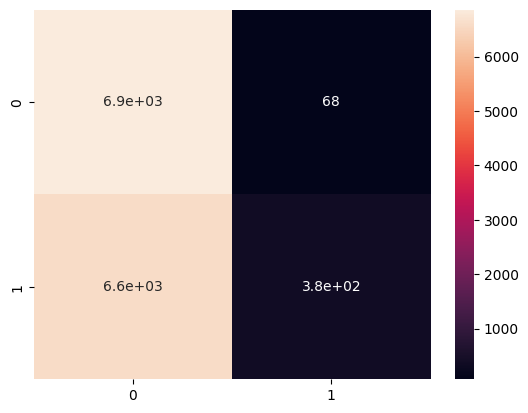

In [49]:
model_lr=LinearRegression()
model_lr.fit(xtrain,ytrain)
result=model_lr.score(xtest,ytest)
accuracy=result*100
predicted_values=model_lr.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using LinearRegression Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Logistic Regression

BY using Logistic Regression Algorithm we get the accuray of 73.64%
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6929
           1       0.77      0.68      0.72      6968

    accuracy                           0.74     13897
   macro avg       0.74      0.74      0.74     13897
weighted avg       0.74      0.74      0.74     13897



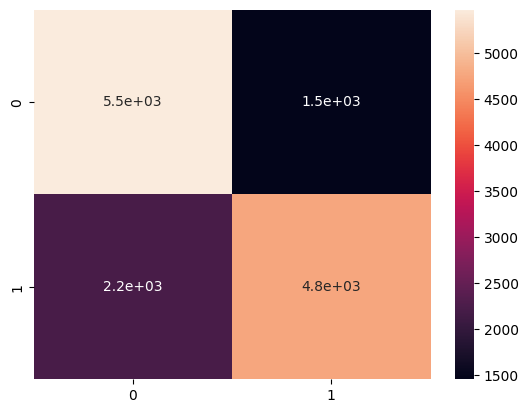

In [50]:
model_lrr=LogisticRegression()
model_lrr.fit(x_train,ytrain)
result=model_lrr.score(x_test,ytest)
accuracy=result*100
predicted_values=model_lrr.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Logistic Regression Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Decision Tree Classifier

BY using Decision Tree Classifier Algorithm we get the accuray of 74.12%
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      6929
           1       0.73      0.77      0.75      6968

    accuracy                           0.74     13897
   macro avg       0.74      0.74      0.74     13897
weighted avg       0.74      0.74      0.74     13897



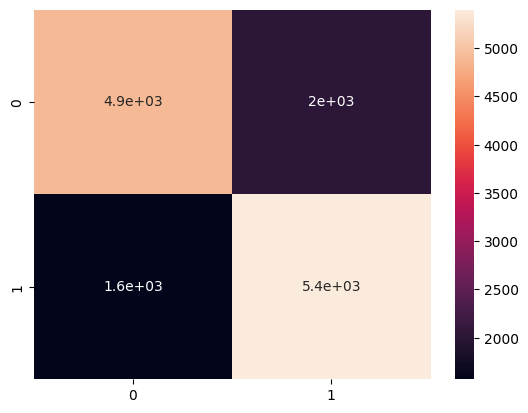

In [91]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,ytrain)
result=model_dt.score(x_test,ytest)
accuracy=result*100
predicted_values=model_dt.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Decision Tree Classifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Random Forest Classifier

BY using Random Forest Classifier Algorithm we get the accuray of 79.41%
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      6929
           1       0.78      0.83      0.80      6968

    accuracy                           0.79     13897
   macro avg       0.80      0.79      0.79     13897
weighted avg       0.80      0.79      0.79     13897



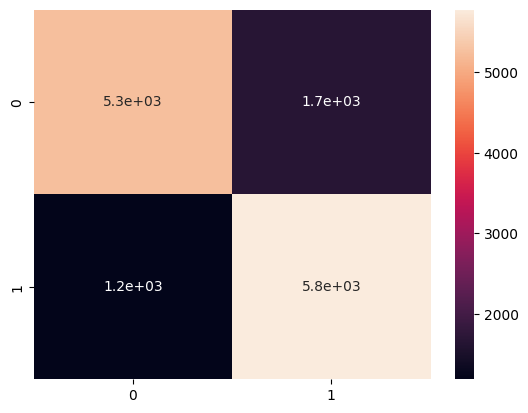

In [53]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,ytrain)
result=model_rf.score(x_test,ytest)
accuracy=result*100
predicted_values=model_rf.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Random Forest Classifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# SCV

BY using SVC Algorithm we get the accuray of 73.96%
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6929
           1       0.77      0.69      0.73      6968

    accuracy                           0.74     13897
   macro avg       0.74      0.74      0.74     13897
weighted avg       0.74      0.74      0.74     13897



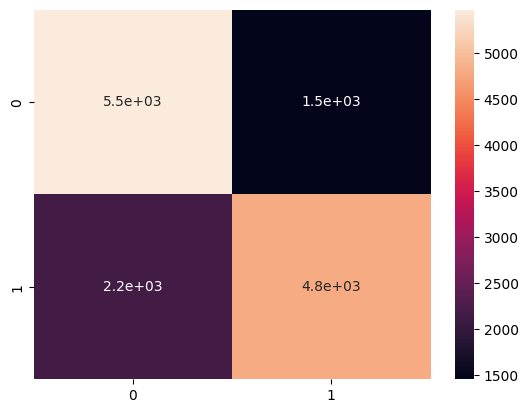

In [54]:
model_svc=SVC(C=1000,gamma=0.001)
model_svc.fit(x_train,ytrain)
result=model_svc.score(x_test,ytest)
accuracy=result*100
predicted_values=model_svc.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using SVC Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))23.76.73.64,73.97,79.41,73.96,

# knn

BY using knn Algorithm we get the accuray of 72.93%
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6929
           1       0.75      0.68      0.72      6968

    accuracy                           0.73     13897
   macro avg       0.73      0.73      0.73     13897
weighted avg       0.73      0.73      0.73     13897



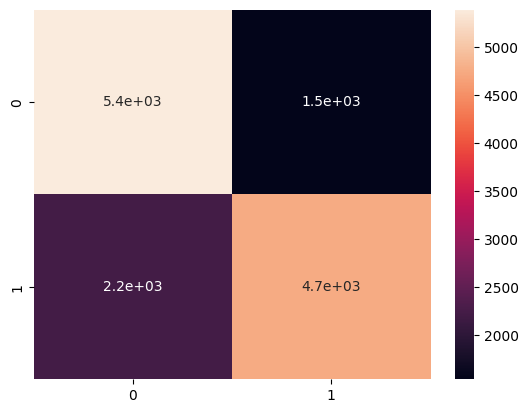

In [58]:
model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(x_train,ytrain)
result=model_knn.score(x_test,ytest)
accuracy=result*100
predicted_values=model_knn.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using knn Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# xgboost

BY using xgboost Algorithm we get the accuray of 74.22%
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6929
           1       0.77      0.70      0.73      6968

    accuracy                           0.74     13897
   macro avg       0.74      0.74      0.74     13897
weighted avg       0.74      0.74      0.74     13897



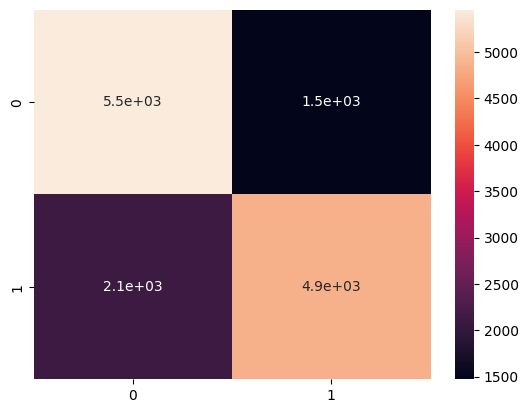

In [59]:
model_xgb=xgb.XGBClassifier(learning_rate=0.01)
model_xgb.fit(x_train,ytrain)
result=model_xgb.score(x_test,ytest)
accuracy=result*100
predicted_values=model_xgb.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using xgboost Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Visualising the accuracy of each Algorithm

[Text(0, 0, '23.76'),
 Text(0, 0, '73.64'),
 Text(0, 0, '74.12'),
 Text(0, 0, '79.41'),
 Text(0, 0, '73.96'),
 Text(0, 0, '72.93'),
 Text(0, 0, '74.22')]

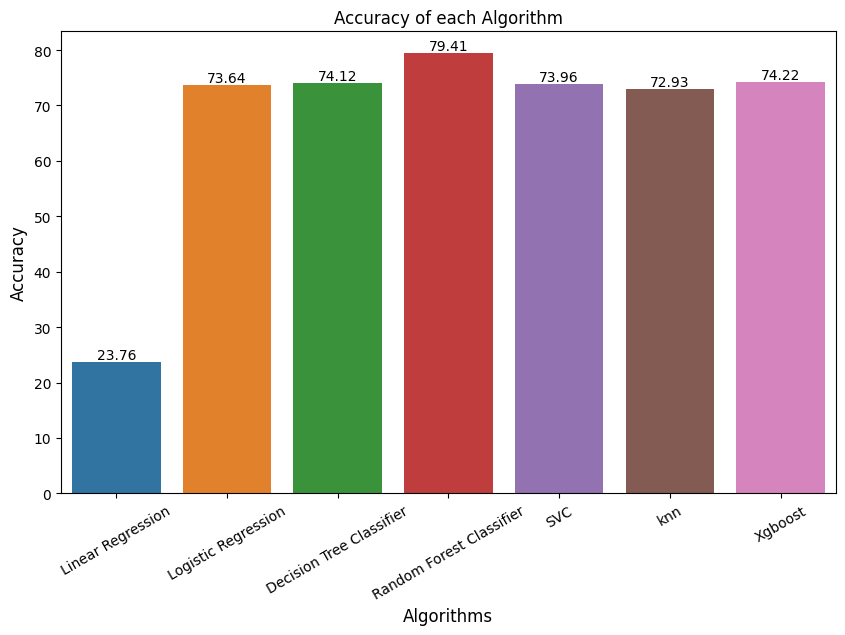

In [92]:
plt.subplots(figsize=(10,6))
ax=sns.barplot(x=["Linear Regression","Logistic Regression","Decision Tree Classifier","Random Forest Classifier","SVC","knn","Xgboost"],y=[23.76,73.64,74.12,79.41,73.96,72.93,74.22])
plt.xticks(rotation=30)
plt.title("Accuracy of each Algorithm")
plt.xlabel("Algorithms",size=12)
plt.ylabel("Accuracy",size=12)
ax.bar_label(ax.containers[0])

BY using StackingCVClassifier Algorithm we get the accuray of 80.25%
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      6929
           1       0.79      0.82      0.81      6968

    accuracy                           0.80     13897
   macro avg       0.80      0.80      0.80     13897
weighted avg       0.80      0.80      0.80     13897



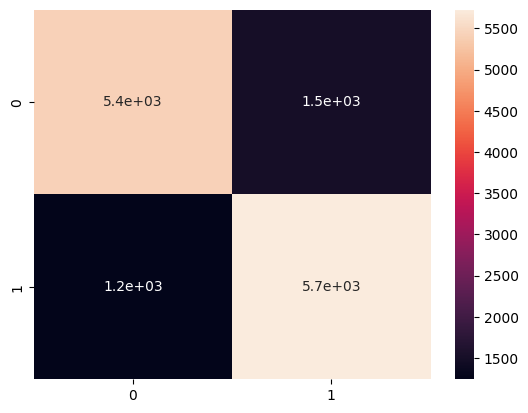

In [95]:
model_sc=StackingCVClassifier(classifiers=[model_dt,model_rf,model_xgb],meta_classifier= model_rf,random_state=42)
model_sc.fit(xtrain,ytrain)
result=model_sc.score(xtest,ytest)
accuracy=result*100
predicted_values=model_sc.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using StackingCVClassifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

In [96]:
pickle.dump(model_sc,open("Cardiovascular_Disease.p","wb"))